In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, transpile, assemble
from qiskit import Aer
from numpy import pi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Import Successfully")

Import Successfully


In [3]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator
print("Import Successfully")

Import Successfully


## Ideal Simulation

In [4]:
n = 4
qc_ideal = QuantumCircuit(n)
for control in range(n):
    qc_ideal.h(control)
    if (control != n - 1):
        for target in range(control + 1, n):
            qc_ideal.cp(pi/2**(target - control), control, target)
    qc_ideal.barrier(x for x in range(n))
qc_ideal.swap(0, 3)
qc_ideal.swap(1, 2)
qc_ideal.save_density_matrix()
qc_ideal.measure_all()
qc_ideal.draw(scale = 0.5, fold = -1)

┌───┐                            ░                         ░                ░       ░        density_matrix  ░ ┌─┐         
   q_0: ┤ H ├─■────────■────────■────────░─────────────────────────░────────────────░───────░──X───────────░─────────░─┤M├─────────
        └───┘ │P(π/2)  │        │        ░ ┌───┐                   ░                ░       ░  │           ░         ░ └╥┘┌─┐      
   q_1: ──────■────────┼────────┼────────░─┤ H ├─■────────■────────░────────────────░───────░──┼──X────────░─────────░──╫─┤M├──────
                       │P(π/4)  │        ░ └───┘ │P(π/2)  │        ░ ┌───┐          ░       ░  │  │        ░         ░  ║ └╥┘┌─┐   
   q_2: ───────────────■────────┼────────░───────■────────┼────────░─┤ H ├─■────────░───────░──┼──X────────░─────────░──╫──╫─┤M├───
                                │P(π/8)  ░                │P(π/4)  ░ └───┘ │P(π/2)  ░ ┌───┐ ░  │           ░         ░  ║  ║ └╥┘┌─┐
   q_3: ────────────────────────■────────░────────────────■────────░───────■────────░─┤ H ├─░──X───────────░─────────░──╫──╫──╫─┤M├
                                         ░                         ░                ░ └───┘ ░              ░         ░  ║  ║  ║ └╥┘
meas_0: ════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬══╬══╬═
                                                                                                                           ║  ║  ║ 
meas_1: ═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                                                                              ║  ║ 
meas_2: ══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬═
                                                                                                                                 ║ 
meas_3: ═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═

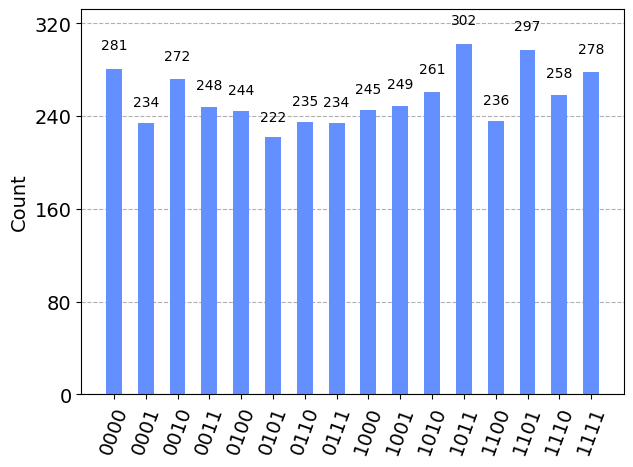

In [5]:
#SIMULAZIONE "IDEALE"
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc_ideal, aer_sim)
qobj = assemble(t_qc)                                
results = aer_sim.run(qobj, shots = 4096).result()

counts = results.get_counts()
plot_histogram(counts)    

In [7]:
#UNITARY IDEAL MATRIX
backend = Aer.get_backend('unitary_simulator')
#The circuit without measurement because in non unitary
n = 4
qc_ideal = QuantumCircuit(n)
for control in range(n):
    qc_ideal.h(control)
    if (control != n - 1):
        for target in range(control + 1, n):
            qc_ideal.cp(pi/2**(target - control), control, target)
    qc_ideal.barrier(x for x in range(n))
qc_ideal.swap(0, 3)
qc_ideal.swap(1, 2)

job = execute(qc_ideal, backend)
result = job.result()
unitary = result.get_unitary(qc_ideal, decimals=1)
unit = np.array(unitary)

#stampo solo la parte reale 
print('\n'.join([''.join([' {0.real:.0f}+{0.imag:.0f}i '.format(item) for item in row]) 
      for row in unit]))

 0+0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i 
 0+0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  0+-0i  -0+0i  -0+0i  -0+0i  -0+0i  -0+0i  -0+0i  -0+0i  -0+0i 
 0+0i  0+-0i  0+-0i  0+-0i  -0+0i  -0+0i  -0+0i  -0+0i  0+0i  0+0i  0+0i  0+0i  -0+-0i  -0+-0i  -0+-0i  -0+-0i 
 0+0i  0+-0i  0+-0i  0+-0i  -0+0i  -0+0i  -0+0i  -0+0i  -0+-0i  -0+-0i  -0+-0i  -0+-0i  0+0i  0+0i  0+0i  0+0i 
 0+0i  0+-0i  -0+0i  -0+0i  0+0i  0+0i  -0+-0i  -0+-0i  0+0i  0+0i  -0+-0i  -0+-0i  -0+0i  -0+0i  0+-0i  0+-0i 
 0+0i  0+-0i  -0+0i  -0+0i  0+0i  0+0i  -0+-0i  -0+-0i  -0+-0i  -0+-0i  0+0i  0+0i  0+-0i  0+-0i  -0+0i  -0+0i 
 0+0i  0+-0i  -0+0i  -0+0i  -0+-0i  -0+-0i  0+0i  0+0i  -0+0i  -0+0i  0+-0i  0+-0i  0+0i  0+0i  -0+-0i  -0+-0i 
 0+0i  0+-0i  -0+0i  -0+0i  -0+-0i  -0+-0i  0+0i  0+0i  0+-0i  0+-0i  -0+0i  -0+0i  -0+-0i  -0+-0i  0+0i  0+0i 
 0+0i  -0+0i  0+0i  -0+-0i  0+0i  -0+-0i  -0+0i  0+-0i  0+0i  -0+-0i  -0+0i  0+-0i  0+0i  -0+-0i  -0+0i 

## Noisy Simulation 

In [8]:
n = 4
qc_noisy = QuantumCircuit(n)
for control in range(n):
    qc_noisy.h(control)
    if (control != n - 1):
        for target in range(control + 1, n):
            qc_noisy.cp(pi/2**(target - control), control, target)
        if (control == 0):
            qc_noisy.id(control)
    qc_noisy.barrier(x for x in range(n))
qc_noisy.swap(0, 3)
qc_noisy.swap(1, 2)
qc_noisy.save_density_matrix()
qc_noisy.measure_all()
qc_noisy.draw(scale = 0.5, fold = -1)

┌───┐                           ┌───┐ ░                         ░                ░       ░        density_matrix  ░ ┌─┐         
   q_0: ┤ H ├─■────────■────────■───────┤ I ├─░─────────────────────────░────────────────░───────░──X───────────░─────────░─┤M├─────────
        └───┘ │P(π/2)  │        │       └───┘ ░ ┌───┐                   ░                ░       ░  │           ░         ░ └╥┘┌─┐      
   q_1: ──────■────────┼────────┼─────────────░─┤ H ├─■────────■────────░────────────────░───────░──┼──X────────░─────────░──╫─┤M├──────
                       │P(π/4)  │             ░ └───┘ │P(π/2)  │        ░ ┌───┐          ░       ░  │  │        ░         ░  ║ └╥┘┌─┐   
   q_2: ───────────────■────────┼─────────────░───────■────────┼────────░─┤ H ├─■────────░───────░──┼──X────────░─────────░──╫──╫─┤M├───
                                │P(π/8)       ░                │P(π/4)  ░ └───┘ │P(π/2)  ░ ┌───┐ ░  │           ░         ░  ║  ║ └╥┘┌─┐
   q_3: ────────────────────────■─────────────░────────────────■────────░───────■────────░─┤ H ├─░──X───────────░─────────░──╫──╫──╫─┤M├
                                              ░                         ░                ░ └───┘ ░              ░         ░  ║  ║  ║ └╥┘
meas_0: ═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬══╬══╬═
                                                                                                                                ║  ║  ║ 
meas_1: ════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                                                                                   ║  ║ 
meas_2: ═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬═
                                                                                                                                      ║ 
meas_3: ══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═

In [37]:
p_error = 1

bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])

In [38]:
print(bit_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘


In [39]:
print(phase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


In [40]:
noise_bit_flip = NoiseModel()
noise_bit_flip.add_quantum_error(bit_flip, ['id'], [0])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  Qubits with noise: [0]
  Specific qubit errors: [('id', (0,))]


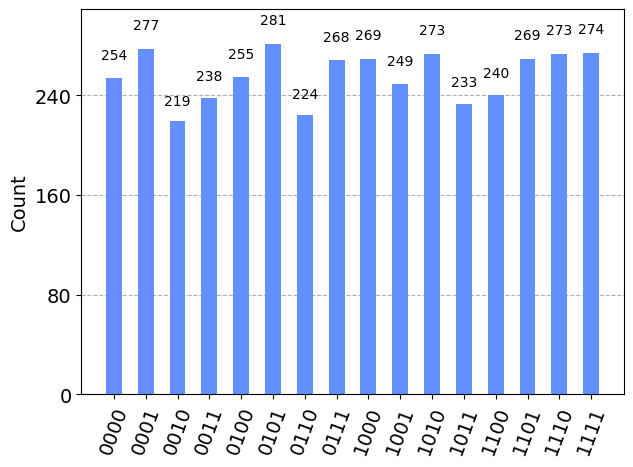

In [41]:
sim_noise = AerSimulator(noise_model = noise_bit_flip)
circ_tnoise = transpile(qc_noisy, sim_noise)
result_bit_flip = sim_noise.run(circ_tnoise, shots = 4096).result()
counts_bit_flip = result_bit_flip.get_counts(0)
matrix = result_bit_flip.data().get('density_matrix')

plot_histogram(counts_bit_flip)

In [42]:
#matrix
print('\n'.join([''.join([' {0.real:.4f}+{0.imag:.2f}i '.format(item) for item in row]) 
      for row in matrix]))

 0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.062

C:\Users\giuli\AppData\Local\Temp\ipykernel_2088\2555488460.py:2: DeprecationWarning: The return type of saved density matrices has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.DensityMatrix` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print('\n'.join([''.join([' {0.real:.4f}+{0.imag:.2f}i '.format(item) for item in row])


In [43]:
noise_phase_flip = NoiseModel()
noise_phase_flip.add_quantum_error(phase_flip, ['id'], [0])

print(noise_phase_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  Qubits with noise: [0]
  Specific qubit errors: [('id', (0,))]


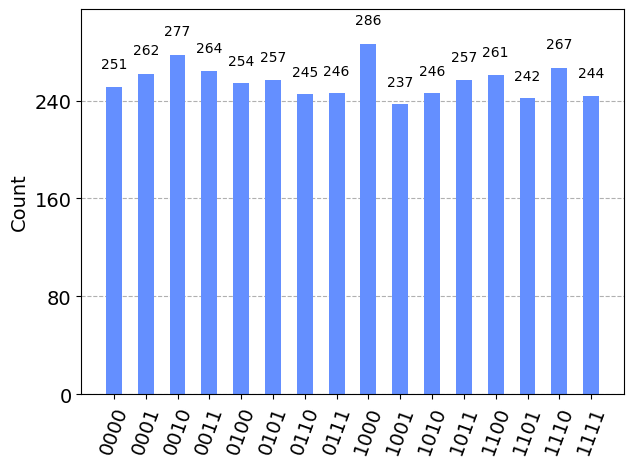

In [44]:
sim_noise = AerSimulator(noise_model = noise_phase_flip)
circ_tnoise = transpile(qc_noisy, sim_noise)
result_phase_flip = sim_noise.run(circ_tnoise, shots = 4096).result()
counts_phase_flip = result_phase_flip.get_counts(0)
matrix = result_bit_flip.data().get('density_matrix')

plot_histogram(counts_phase_flip)



In [45]:
print('\n'.join([''.join([' {0.real:.4f}+{0.imag:.2f}i '.format(item) for item in row]) 
      for row in matrix]))

 0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i 
 0.0625+-0.00i  0.0625+-0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.0625+0.00i  0.062

C:\Users\giuli\AppData\Local\Temp\ipykernel_2088\1837834913.py:1: DeprecationWarning: The return type of saved density matrices has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.DensityMatrix` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print('\n'.join([''.join([' {0.real:.4f}+{0.imag:.2f}i '.format(item) for item in row])
